In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
Nutrients=pd.read_csv('nutrient.csv',index_col=0)
scalar=StandardScaler()
Nutrientsscaled=scalar.fit_transform(Nutrients)

Nutrientsscaled=pd.DataFrame(Nutrientsscaled,columns=Nutrients.columns,index=Nutrients.index)

In [4]:
clust_DB = DBSCAN(eps=1,min_samples=2)
clust_DB.fit(Nutrientsscaled)
print(clust_DB.labels_)

[ 0  0 -1  0  1  1  1 -1  0  0  0  0  0  0  1  1 -1 -1  2  2  2  3  2  3
 -1  1 -1]


In [5]:
Nutrientsscaled['Clust'] = clust_DB.labels_
Nutrients_scl_inliers = Nutrientsscaled[Nutrientsscaled['Clust']!=1]
print(silhouette_score(Nutrients_scl_inliers.iloc[:,:-1],
                      Nutrients_scl_inliers.iloc[:,-1]))

0.28144117526350715


In [6]:
eps_range=[0.2,0.4,0.6,1]
mp_range=[2,3,4,5]
dic={}

for i in eps_range:
    for j in mp_range:
        try:
            scalar=StandardScaler()
            Nutrientsscaled=scalar.fit_transform(USArrest)
            Nutrientsscaled=pd.DataFrame(Nutrientsscaled,columns=Nutrients.columns,index=Nutrients.index)
            clust_DB = DBSCAN(eps=i,min_samples=j)
            clust_DB.fit(Nutrientsscaled)
            Nutrientsscaled['Clust'] = clust_DB.labels_
            Nutrients_scl_inliers = Nutrientsscaled[Nutrientsscaled['Clust']!=-1]
            dic[str(i)+','+str(j)]=silhouette_score(Nutrients_scl_inliers.iloc[:,:-1],
                                                 Nutrients_scl_inliers.iloc[:,-1])
        
        except:
            dic[str(i)+','+str(j)]=-1


        
      

In [7]:
dic

{'0.2,2': -1,
 '0.2,3': -1,
 '0.2,4': -1,
 '0.2,5': -1,
 '0.4,2': -1,
 '0.4,3': -1,
 '0.4,4': -1,
 '0.4,5': -1,
 '0.6,2': -1,
 '0.6,3': -1,
 '0.6,4': -1,
 '0.6,5': -1,
 '1,2': -1,
 '1,3': -1,
 '1,4': -1,
 '1,5': -1}

In [ ]:
###########  plotting PCS ########################################

In [11]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

prcomp=PCA()
scores=prcomp.fit_transform(Nutrientsscaled.iloc[:,:5])
clust_DB = DBSCAN(eps=2,min_samples=2)
clust_DB.fit(Nutrientsscaled.iloc[:,:5])
print(clust_DB.labels_)


[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0
 -1  0  0]


In [12]:
df_PCs=pd.DataFrame({'PC1':scores[:,0],'PC2':scores[:,1],'Cluster':clust_DB.labels_})
df_PCs['Cluster']=df_PCs['Cluster'].astype(object)


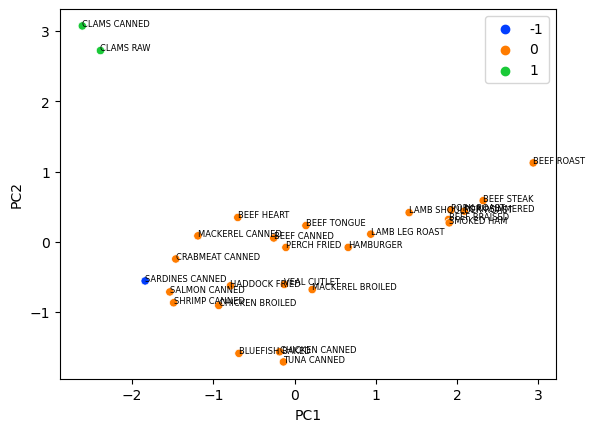

In [13]:
sns.scatterplot(data=df_PCs,x='PC1',palette='bright',y='PC2',hue='Cluster')
for i in np.arange(0,Nutrients.shape[0]):
    plt.text(scores[i,0],scores[i,1],list(Nutrients.index)[i],fontsize=6)
    
plt.legend(loc='best')
plt.show()